In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

C:\Users\TAHA\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\TAHA\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\TAHA\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [9]:
dataset=pd.read_csv(r"C:\Users\TAHA\Desktop\Position_Salaries.csv")
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
X=dataset.iloc[:,1:2].values.astype(float)
y=dataset.iloc[:,2:3].values.astype(float)

In [11]:
#featureScaling
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

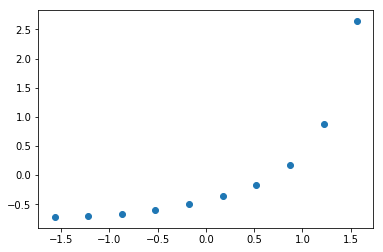

In [12]:
plt.scatter(X,y)
plt.show()

In [13]:
model=SVR(kernel='rbf')
model.fit(X,y)

C:\Users\TAHA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

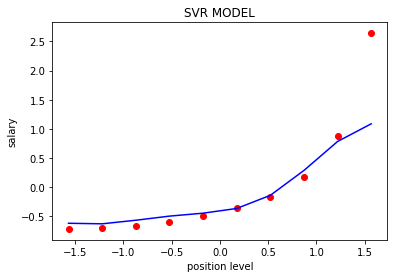

In [14]:
plt.scatter(X,y,color="red")
plt.plot(X,model.predict(X),color="blue")
plt.title("SVR MODEL")
plt.xlabel("position level")
plt.ylabel("salary")
plt.show()

In [18]:
y_pred = sc_y.inverse_transform ((model.predict(sc_X.transform(np.array([[10]])))))
y_pred

C:\Users\TAHA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([557821.75899897])

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X)
poly.fit(X_poly,y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [22]:
from sklearn.linear_model import LinearRegression
poly_model=LinearRegression()
poly_model.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

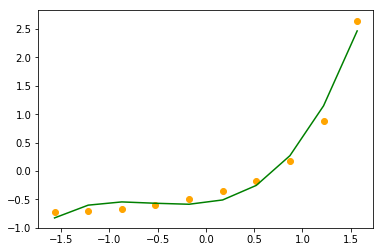

In [25]:
plt.scatter(X,y,color="orange")
plt.plot(X,poly_model.predict(poly.fit_transform(X)),color="green")
plt.show()